<a href="https://colab.research.google.com/github/MonikaLamba/Quantum-Computing_CDAC_FEB_2026/blob/main/Quantum_Gates_Tutorial_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Quantum Gates Tutorial**
*by Kanishka Padamata, Knowledge associate at C-DAC Pune*


# **Qiskit Installation**

Before we start working with quantum circuits, we need to install **Qiskit** and some additional libraries.


Qiskit is an open-source Python framework developed by IBM for working with quantum computers. It allows us to:

✔ Design and simulate quantum circuits  
✔ Run experiments on real IBM Quantum devices  
✔ Visualize results using different plotting tools  

**The following command installs the latest version of Qiskit, including its core components which includes:**

- `qiskit` → Core Qiskit library (Quantum circuits, gates, transpilers)
- `qiskit-aer` → Required for simulating quantum circuits on classical hardware


In [1]:
!pip install qiskit
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 42.6 MB/s eta 0:00:00


In [2]:
#check version of qiskit
import qiskit
print(qiskit.__version__)  # Should print the installed version

2.3.0


### **Installing Additional Libraries**  
Qiskit uses **Matplotlib** for visualizing quantum circuits and Bloch spheres.

For example, the **pylatexenc** library is needed for Matplotlib-based circuit diagrams.


In [ ]:
!pip install matplotlib
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=f18c8524d5fb04e9c11acd7bbcf50b1b44097b34b086dcd20400a71b2918bcfd
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


# **Import Libraries**

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_distribution, plot_bloch_multivector
from qiskit.quantum_info import Statevector

from IPython.display import display, Latex

import numpy as np
import matplotlib.pyplot as plt
import pylatexenc

# **Sample circuit**

The process of generating a quantum circuit in Qiskit involves the following steps:


1. **Create a quantum circuit**  
   - Define quantum and classical registers  
2. **Apply gate operations and measurements**  
   - Manipulate qubits using quantum gates  
   - Measure qubits to extract classical outcomes  
3. **Initialize a simulator**  
   - Use a quantum simulator to execute the circuit
   - This runs quantum operations on classical hardware
4. **Run the circuit on the simulator and retrieve results**  
   - Execute the circuit and analyze the output


Let's Run a Small 2-Qubit Circuit

In [ ]:
'''Step 1: Create a quantum circuit'''

qr = QuantumRegister(2) # Initialize Quantum Register that can store 2 qubits
cr = ClassicalRegister(2) # Initialize classical Register that can store 2 classical bits
qc = QuantumCircuit(qr, cr)     # create a circuit from these registers
qc.draw(output='mpl', cregbundle=False)

In [ ]:
'''Step 2: Apply Gate operations and measurements'''

#apply X gate on qubit 0

qc.x(qr[0])
qc.draw(output='mpl', cregbundle=False)

In [ ]:
#apply X on qubit 1

qc.x(qr[1])
qc.draw(output='mpl', cregbundle=False)

In [ ]:
#measure the qubits
qc.measure(qr,cr)
qc.draw(output='mpl', cregbundle=False)

# or you can write the below which will also give same output
# qc.draw('mpl')

In [ ]:
qc.draw(output='mpl')

In [ ]:
'''Step 3: Initialize a simulator'''

#Intialize the simulator
backend = AerSimulator()   #This is general purpose quantum simulator framework but qiskit does have other specialized simulators

In [ ]:
'''Step 4: Run the circuit on the simulator and retrieve results'''

# Create the circuit for the give
# Run ideal simulation
ideal_results = backend.run(transpile(qc, backend), shots=1000).result()
ideal_counts = ideal_results.get_counts()
print(ideal_counts)
plot_histogram(ideal_counts)


# **Quantum gates**
We saw that qubits could be represented by 2D vectors, and that their states are limited to the form:

$$  |0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix} \quad and \quad
 |1\rangle  = \begin{bmatrix} 0 \\ 1 \end{bmatrix} $$

That  is  for any arbitary state
$$ |q\rangle = \alpha |0\rangle + \beta |1\rangle $$
A single qubit is represented by $ |q\rangle = \begin{bmatrix}\alpha \\ \beta\end{bmatrix}$, where $\alpha, \beta \in \mathbb{C}$ and $|\alpha|^{2} + |\beta|^{2} = 1$.

$$ |q\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle $$

Where Θ and ϕ  are real numbers.


**Quantum Gates** *are the fundamental operations in quantum computing, manipulating qubits to perform computations beyond classical capabilities*

*  Unlike classical logic gates, quantum gates leverage principles like superposition and entanglement
*  An Important Feature of quantum circuits is that between intialising the qubits and measuring them, **the operations(gates) are always reversible.**
*  These reversible gates can be represented as matrices, and as rotations around the Bloch sphere.
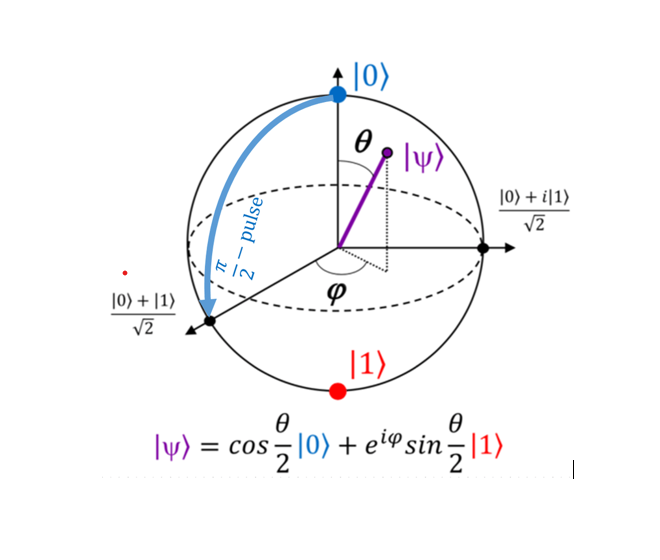










#### **Mathematical Representation of Quantum Gates**
Since quantum gates are **reversible**, they must follow certain mathematical properties.  
Each quantum gate corresponds to a **unitary matrix**  $U$, which transforms qubit states:  

$$
|q' \rangle = U |q\rangle
$$

where $U$ is a **unitary matrix**, meaning it satisfies:  

$$
U^\dagger U = I
$$

This ensures that quantum transformations are **lossless and reversible**, preserving the total probability of the system.  



#### **Why Quantum Gates Are Unitary**  
Take the **Pauli-X gate**, which swaps $ |0\rangle$ and $|1\rangle$:  

$$
X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
$$

Checking if it is unitary:  

$$
X^\dagger = X, \quad X^\dagger X = I
$$

Since $X$ satisfies the unitary condition, it is a valid quantum gate.  


Now that we understand **unitary transformations**, let’s explore the most fundamental quantum gates


### **Quantum gates are mainly of two types**
#### 1. Single-Qubit Gates
      *   Pauli Gates (X ,Y , Z)
      *   Hadamard gate (H)
      *   Identity gate (I)  
      *   Phase Gates (S and T gates)
      *   Rotation Gates (Rx,Ry,Rz)


#### 2. Multi-Qubit Gates
      *   CNOT Gate
      *   CZ gate
      *   Toffoli Gate (CCNOT)
      *   SWAP Gate
      *   Composite Gates






# **1. Single Qubit Gates**





## **1.1 Pauli Gates**

### $1.1.1 \ Pauli$ -$X \ Gate$

The X-gate is represented by the Pauli-X matrix (a unitary matrix)

$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = |0\rangle\langle1| + |1\rangle\langle0| $$

To see the effect a gate has on a qubit, we simply multiply the qubit’s statevector by the gate. We can see that the X-gate switches the amplitudes of the states $|0\rangle$ and $|1\rangle$:

$$ X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle$$

$$ X|1\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} = |0\rangle$$

$$ X(\alpha|0\rangle + \beta|1\rangle)= \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} \alpha \\ \beta \end{bmatrix} = \begin{bmatrix} \beta \\ \alpha \end{bmatrix}= \beta|0\rangle + \alpha|1\rangle $$


* This computations can be also done using outer and inner products.
 <details>
 <summary><i>What are Inner and Outer Product?</i></summary>
  1. Inner product(Dot product):

     -  The inner product tells us "how much of one vector is in another".
     -  For Example, ⟨0|1⟩ = 0 meaning |0⟩ and |1⟩ have no overlap (they are orthogonal)

  2. Outer Product(matrix):
     - outer product is like creating an operation that "projects" one state onto another.
     - Instead of giving a number like the inner product, the outer product produces another vector (or a matrix).
     - Example : |0⟩⟨1|
        - ⟨1| extracts the coefficient of |1⟩
        - |0⟩ ensures the result is now in the |0⟩ state
        - if applied to |1⟩,it flips to |0⟩
 </details>

 $$
      \begin{aligned}
      X|1\rangle & = (|0\rangle\langle1| + |1\rangle\langle0|)|1\rangle \\
                 & = |0\rangle\langle1|1\rangle + |1\rangle\langle0|1\rangle \\
                 & = |0\rangle \times 1 + |1\rangle \times 0 \\
                 & = |0\rangle
      \end{aligned}
  $$

  where $ \langle0| $,$ \langle1| $,  are conjugate transpose of $ |0\rangle$ & $ |1\rangle$
  $$
      \begin{aligned}
      |0\rangle\langle1| + |1\rangle\langle0|& = \begin{bmatrix} 1 \\ 0 \end{bmatrix} \begin{bmatrix} 0 & 1\end{bmatrix} + \begin{bmatrix} 0 \\ 1 \end{bmatrix} \begin{bmatrix} 1 & 0 \end{bmatrix}\\
      & = \begin{bmatrix} 0 & 1 \\ 0 & 0 \end{bmatrix} + \begin{bmatrix} 0 & 0 \\ 1 & 0 \end{bmatrix} \\
      & = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = X
      \end{aligned}
  $$


*   X gate Flips the bit same as ***NOT gate in Classical***

$$ X|0\rangle = |1\rangle $$
$$ X|1\rangle = |0\rangle $$

*  In Bloch Sphere You can think this is as a rotation by **π** radians around the x-axis

**In Qiskit** we use `qc.x(qubit index)`

In [ ]:
qc= QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

**Example: Apply X gate on |0⟩ which should give |1⟩**

In [ ]:
# create a circuit with one qubit and one classical bit
qc = QuantumCircuit(1,1)
initial_state = Statevector.from_instruction(qc)        # Get the statevector

#apply X gate
qc.x(0)
final_state = Statevector.from_instruction(qc)        # Get the statevector

# measure
qc.measure(0,0)

# draw the circuit
qc.draw('mpl')


In [ ]:
#if you run this circuit in simulator it will measure 1
backend = AerSimulator()
results = backend.run(transpile(qc, backend), shots=1000).result()
counts = results.get_counts()
plot_histogram(counts)

**Bloch sphere Transformation**

In [ ]:
#Visualize bloch Sphere for initial state
plot_bloch_multivector(initial_state,title="|0> Initial State")  #Plot bloch Sphere

In [ ]:
# visualize Bloch sphere after applying X-gate
plot_bloch_multivector(final_state,title="X|0> =|1> Final State")  #Plot bloch Sphere

### $1.1.2 \ Pauli$ -$Z \ Gate$

The Z-gate is represented by the Pauli-z matrix

$$ Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} = |0\rangle\langle0| - |1\rangle\langle1| $$

We can see that the Z-gate changes the phase  $|0\rangle$ and $|1\rangle$:

$$ Z|0\rangle =  |0\rangle$$

$$ Z|1\rangle = -|1\rangle$$

$$ Z(\alpha|0\rangle + \beta|1\rangle)=  \alpha|0\rangle - \beta|1\rangle $$


*  Z- gate flips the Phase of the state

*  In Bloch Sphere You can think this is as a rotation by **π** radians around the z-axis

**In Qiskit** we use `qc.z(qubit)`

In [ ]:
qc = QuantumCircuit(1)
qc.z(0)
qc.draw('mpl')

#### **Example-1:**  
$ Z(\tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle))= \tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle))$


In [ ]:
#Let's create a arbitary state where
initial_state = [1/np.sqrt(2), 1/np.sqrt(2)]


# Initialize our qubit
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)

initial_state = Statevector.from_instruction(qc)        # Get the statevector

#apply Z gate
qc.z(0)
final_state = Statevector.from_instruction(qc)        # Get the statevector

# measure
qc.measure(0,0)

# draw the circuit
qc.draw('mpl')

You can run this circuit on the simulator and see the result

In [ ]:
backend = AerSimulator()
results = backend.run(transpile(qc, backend), shots=1000).result()
counts = results.get_counts()
plot_histogram(counts)

In [ ]:
plot_bloch_multivector(initial_state, title="|+⟩ Initial State")

In [ ]:
plot_bloch_multivector(final_state, title="Z|+⟩ =|-⟩ final State")

#### **Example-2:**  
$ Z|1\rangle = -|1\rangle$



In [ ]:
qc = QuantumCircuit(1,1)
qc.x(0)

initial_state = Statevector.from_instruction(qc)        # Get the statevector

#apply Z gate
qc.z(0)
final_state = Statevector.from_instruction(qc)        # Get the statevector

# measure
qc.measure(0,0)

# draw the circuit
qc.draw('mpl')

Run the simulation and see the results for yourself

In [ ]:
#Uncomment the Below lines for running on the simulation

# backend = AerSimulator()
# results = backend.run(transpile(qc, backend), shots=1000).result()
# counts = results.get_counts()
# plot_histogram(counts)

In [ ]:
print('initial_state:')
initial_state.draw('latex')

In [ ]:
print('final_state:')
final_state.draw('latex')

In [ ]:
plot_bloch_multivector(initial_state, title="|1⟩ Initial State")

In [ ]:
plot_bloch_multivector(initial_state, title="Z|1⟩ =-|1⟩ Final State")

#####**Why Does $-|1⟩$ and $|1⟩$ looks the same in the bloch sphere?**

The reason is that $-|1⟩$ and $|1⟩$ differ only by a *global phase factor* $-1$ which has no observable effect in quantum mechanics.

-  Global phase factors **do not affect measurement outcomes**

-  The Bloch sphere represents **quantum states up to a global phase**, which is why $|\psi⟩$ and $e^{i\theta}|\psi⟩$ for any real $\theta$ appear the same.

-Since $-|1⟩ = e^{i\pi}|1⟩$, it respresented same as $|1⟩$ on bloch sphere


\\
\
*If you want to check this you can simulate a circuit where |1⟩ is the final state and compare the results with the above example where final state is -|1⟩*


### $1.1.3 \ Pauli$ -$Y \ Gate$
The Y-gate is represented by the Pauli-Y matrix

$$ Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} = -i|0\rangle\langle1| + i|1\rangle\langle0| $$

Y-gate switches the amplitudes of the states and adds a phase flip $|0\rangle$ and $|1\rangle$:

$$ Y|0\rangle =  \begin{bmatrix} 0 \\ i \end{bmatrix} = i|1\rangle$$

$$ Y|1\rangle  = \begin{bmatrix} -i \\ 0 \end{bmatrix} = -i|0\rangle$$

$$ Y(\alpha|0\rangle + \beta|1\rangle) = \begin{bmatrix} -i\beta \\ i\alpha \end{bmatrix}= -i\beta|0\rangle + i\alpha|1\rangle $$

*  $Y=iXZ$

*  In Bloch Sphere You can think this is as a rotation by **π** radians around the y-axis

**In Qiskit** we use `qc.y(0)`

In [ ]:
qc = QuantumCircuit(1)
qc.y(0)
qc.draw('mpl')

**Example**:$ Y(\tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle))= \tfrac{1}{\sqrt{2}}(-i|0\rangle + i|1\rangle))$

the final state can also be wriiten as $(-i)\tfrac{1}{\sqrt{2}}(|0\rangle -|1\rangle) $

here Our Final state has a global phase of (-i) which can be ignored
$ Y|+⟩=-i|-⟩  \sim |-⟩$






In [ ]:
#Let's create a arbitary state where
initial_state = [1/np.sqrt(2), 1/np.sqrt(2)]


# Initialize our qubit
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)

initial_state = Statevector.from_instruction(qc)        # Get the statevector

#apply y gate
qc.y(0)
final_state = Statevector.from_instruction(qc)        # Get the statevector

# measure
qc.measure(0,0)

# draw the circuit
qc.draw('mpl')

In [ ]:
initial_state.draw('latex')

In [ ]:
final_state.draw('latex')

In [ ]:
plot_bloch_multivector(initial_state, title="|+⟩ Initial State")

In [ ]:
plot_bloch_multivector(final_state, title="Y|+⟩= -i|-⟩ Final State")

## **1.2 Hadamard Gate**  
The **Hadamard gate (H-gate)** is a fundamental quantum gate. It allows us to move away from the poles of the Bloch sphere and create **superposition**.  

It is defined by the **unitary matrix**:  

$$
H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
$$  

### **Effect of Hadamard Gate**  
The Hadamard gate **transforms the computational basis states** as follows:  

$$
H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = |+\rangle
$$  

$$
H|1\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) = |-\rangle
$$  

- *The Hadamard gate creates a superposition of all possible states.*  

### **Effect on an Arbitrary State**  
For a general qubit state:  

$$
H(\alpha|0\rangle + \beta|1\rangle) = \frac{1}{\sqrt{2}} \begin{bmatrix} \alpha + \beta \\ \alpha -\beta \end{bmatrix} = \alpha(\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle))+ \beta ( \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) )
$$  

Rewriting this in terms of the **Hadamard basis** $|+\rangle$  and $|-\rangle$:  

$$
H(\alpha|0\rangle + \beta|1\rangle) = \alpha|+\rangle + \beta|-\rangle
$$  

- *Applying Hadamard changes the basis from $ |0\rangle, |1\rangle $to $ |+\rangle, |-\rangle $.*  

**Geometric Interpretation**  
- The Hadamard gate can be seen as a rotation around an axis **located halfway between the x-axis and z-axis** on the Bloch sphere.  
- Physically, it performs a half-turn (π rotation) on the Bloch sphere.  

**Some transformations of the Hadamard Gate**  
The Hadamard gate satisfies the following transformations :  

$$
H X H = Z
$$
$$
H Z H = X
$$
$$
H Y H = -Y
$$

These transformations are useful in various quantum algorithms.  
  
In **Qiskit**, you can apply the Hadamard gate using:  

```python
qc.h(qubit_index)


In [ ]:
qc= QuantumCircuit(1)
qc.h(0)
qc.draw('mpl')

####**Example-1**
$H|0⟩= |+⟩$

In [ ]:
qc = QuantumCircuit(1,1)
initial_state = Statevector.from_instruction(qc)

#Apply Hadamard
qc.h(0)
#store the state vector as it gets destoryed after measurement
final_state = Statevector.from_instruction(qc)

qc.measure(0,0)
qc.draw('mpl')

In [ ]:
# Initialize the simulator
backend = AerSimulator()

# Run ideal simulation
h_results = backend.run(transpile(qc, backend), shots=1000).result()
h_counts = h_results.get_counts()

# Show the results
print(h_counts)
plot_histogram(h_counts)

In [ ]:
final_state.draw('latex')

In [ ]:
plot_bloch_multivector(final_state, title="H|0⟩= |+⟩ Final State")

####**Example-2**
**Hadamards on each qubit in a 2-qubit system**

Gives Superposition of all 4 possible state


In [ ]:
qc = QuantumCircuit(2,2)
initial_state = Statevector.from_instruction(qc)

#Apply Hadamard on qubit 1 qnd qubit 0
qc.h(0)
qc.h(1)


#store the state vector as it gets destoryed after measurement
final_state = Statevector.from_instruction(qc)

qc.measure(0,0)
qc.draw('mpl')

In [ ]:
# Initialize the simulator
backend = AerSimulator()

# Run ideal simulation
h_results = backend.run(transpile(qc, backend), shots=1000).result()
h_counts = h_results.get_counts()

# Show the results
print(h_counts)
plot_histogram(h_counts)

In [ ]:
final_state.draw('latex')

In [ ]:
plot_bloch_multivector(final_state, title="H|0⟩= |+⟩ Final State")

## **1.3 Identity gate**
Also Called I-gate or Id-gate. It is represented by identity matrix

$$ I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} $$

$$ I|0\rangle =  |0\rangle \ and \  I|1\rangle = |1\rangle $$

$$ I(\alpha|0\rangle + \beta|1\rangle)=  \alpha|0\rangle + \beta|1\rangle $$



* Identity Gate anywhere in the circuit should have no effect on the qubit state.  
*   Then why is it even considered a gate?

      1.  Becuase it's often used in calculations. For example it can used to prove every gate is it inverse
      $$ I= XX = ZZ= YY = HH $$

      2. Another reason is that its often useful in real hardware to specify a 'do-nothing' operation  


    



In [ ]:
qc = QuantumCircuit(1)
qc.id(0)
qc.draw('mpl')

## **1.4 Phase Gates**



### $1.4.1 \ P$-$Gate$
Also called P-gates. They all have the matrix form
The P-gate (phase gate) is _parametrised,_ that is, it needs a number ($\phi$) to tell it exactly what to do. The P-gate performs a rotation of $\phi$ around the Z-axis direction. It has the matrix form:

$$
P(\phi) = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\phi} \end{bmatrix}
$$

Where $\phi$ is a real number.


In Qiskit, we specify a P-gate using `p(phi, qubit):`

In [ ]:
qc = QuantumCircuit(1)
qc.p(np.pi/4, 0)
qc.draw('mpl')

### $1.4.2 \ S$-$Gate$
*    the S-gate sometimes also known as the $\sqrt{Z}$-gate.

*    In Bloch Sphere it does a quarter turn around z-axis (π/2) radians

*   Unlike Other gates Phase gates or not its own inverse. So we have  S<sup>†</sup>-gate, (also “S-dagger”, “Sdg” or $\sqrt{Z}^\dagger$-gate).

* S<sup>†</sup>-gate, is a P-gate with Φ = -(π/2)  and S-gate is a is a P-gate with Φ = (π/2)


$$ S = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{2}} \end{bmatrix}, \quad  S^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{2}} \end{bmatrix}$$

*  It also called $\sqrt{Z}$-gate. becuase two S- gates means one Z gate
$$ SS|q⟩= Z|q\rangle$$











In [ ]:
qc = QuantumCircuit(1)
qc.s(0)   # Apply S-gate to qubit 0
qc.sdg(0) # Apply Sdg-gate to qubit 0
qc.draw('mpl')

### $1.4.3 \ T$-$Gate$

The T-gate is a very commonly used gate, it is an P-gate with $\phi = \pi/4$:

$$ T = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{4}} \end{bmatrix}, \quad  T^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{4}} \end{bmatrix}$$

As with the S-gate, the T-gate is sometimes also known as the $\sqrt[4]{Z}$-gate.

that is becuase 4 T-gates equals to one Z-gate

$$ T^4|q⟩= Z|q\rangle$$

 In Bloch Sphere it does a (π/4) radians around z-axis

In Qiskit:

In [ ]:
qc = QuantumCircuit(1)
qc.t(0)   # Apply T-gate to qubit 0
qc.tdg(0) # Apply Tdg-gate to qubit 0
qc.draw('mpl')

## **1.5 Rotation Gates**

These gates rotates the Bloch vector around $x$, $y$ , and $z$-axis by $\theta$, respectively.



### **$1.5.1 \  R_x \ Gate$**

Matrix expression
$$ R_x(θ) = \begin{bmatrix} \cos(θ/2) & -i\sin(θ/2) \\ -i\sin(θ/2) & \cos(θ/2) \end{bmatrix}$$
\
Pauli-Expression
$$ R_x(θ) = e^{-iX\theta/2} = \cos(θ/2) I -i\sin(θ/2)X  $$
\
This Gate Transforms the $|0\rangle$ and $|1\rangle$

*   $R_x(θ)|0⟩ =\cos(θ/2)|0⟩ - i\sin(θ/2)|1⟩$
*   $R_x(θ)|1⟩ =-i\sin(θ/2)|0⟩ +\cos(θ/2)|1⟩ $

if $θ$ is $π$ radians then we can get $X$-gate
$$ X=iR_x(π) \sim R_x(π)$$

Why is '$i$' ignored here?

*Because it is a **global phase factor**, and global phases do not affect measurements, so they can be ignored.*




### **$1.5.2 \  R_y \: Gate $**
$$ R_y(θ) = \begin{bmatrix} \cos(θ/2) & -\sin(θ/2) \\ \sin(θ/2) & \cos(θ/2) \end{bmatrix}$$

\
Pauli-Expression
$$ R_y(θ) = e^{-iY\theta/2} = \cos(θ/2) I -i\sin(θ/2)Y  $$
\
This Gate Transforms the $|0\rangle$ and $|1\rangle$

*   $R_y(θ)|0⟩ =\cos(θ/2)|0⟩ - \sin(θ/2)|1⟩$
*   $R_y(θ)|1⟩ =\sin(θ/2)|0⟩ +\cos(θ/2)|1⟩ $

For $θ=π$ radians then we can get $Y$-gate
$$ Y=iR_y(π) \sim R_y(π)$$

### **$1.5.3 \  R_z \: Gate $**

$$R_z(θ) = \begin{bmatrix} e^{-i\theta/2}  & 0 \\ 0 & e^{i\theta/2} \end{bmatrix}$$

\
Pauli-Expression
$$ R_z(θ) = e^{-iZ\theta/2} = \cos(θ/2) I -i\sin(θ/2)Z  $$
\
This Gate Transforms the $|0\rangle$ and $|1\rangle$

*   $R_z(θ)|0⟩ =e^{-i\theta/2}|0⟩$
*   $R_z(θ)|1⟩ =e^{-i\theta/2}|1⟩$

One important thing remember is that $R_z$ nothing but a phase gate

$$
P(\theta) \sim R_z(2θ)$$
\
$$R_z(2θ) = \begin{bmatrix} e^{-i(2\theta)/2}  & 0 \\ 0 & e^{i(2\theta)/2} \end{bmatrix} = e^{-i\theta}\begin{bmatrix} 1 & 0 \\ 0 & e^{i\theta} \end{bmatrix} =  e^{-i\theta}P(θ)
$$
\
if $θ = π$ radians then we can get $Z$-gate
$$ Z=iR_Z(π) \sim R_Z(π)$$

Similarly we can get S and T gates as they are phase gates
$$ S\sim R_Z(π/2)$$
$$ T\sim R_Z(π/4)$$

In qiskit we use this for rotation gates

```
qc.rx(θ, qubit)
qc.ry(θ, qubit)
qc.rz(θ, qubit)

The angle of rotation must be specified in radians and can be positive or negative.
```

**Example :** Starting with $|0⟩$, rotate about the $y$ axis by $π/3$
, about $z$ axis by $π/2$, and about $x$ axis by $-2π/3$. This example shows that the final state is $|1⟩$.

In [ ]:
qc=QuantumCircuit(1,1)

#apply Rotation gates
qc.ry(np.pi/3,0)
qc.rz(np.pi/2,0)
qc.rx(-2*np.pi/3,0)


#draw the circuit
qc.draw('mpl')


In [ ]:
#load the visdualization tool
from qiskit.visualization import visualize_transition

# generate a movie (it will be shown in next cell,
transformation=visualize_transition(qc)

In [ ]:
transformation

In [ ]:
qc.measure(0,0)
# Initialize the simulator
backend = AerSimulator()

# Run ideal simulation
Rgate_results = backend.run(transpile(qc, backend), shots=1000).result()
Rgate_counts = Rgate_results.get_counts()

# Show the results
print(Rgate_counts)
plot_histogram(Rgate_counts)

**By Now It Should be Obvious that there are infinitely many possible single-qubit Gates.**

However before running on real IBM quantum Hardware all single-qubit operations are compiled down to **Physical gates**:

```
1.   I (Identity)
2.   X (NOT gate)
3.   SX (Square root of X)
4.   Rz(Z-axis rotation)
```

Why only these?

IBM chooses $I,X,SX,R_z$ because they are natively supported in superconducting qubits.

# **2. Multi-Qubit Gates**
we know that a single qubit is defined by $|q\rangle = \begin{bmatrix}\alpha \\ \beta\end{bmatrix}$.
For a Multi- Qubit System  (let's say n-qubit system) it is represented by $2^n$ states i.e a  $2^n$ x $1$ column matrix.

\
for a 2- qubit system (n=2) the system can be seen as a superosition of 4 (i.e $2^2$) states $|00⟩ ,|01⟩,|10⟩,|11\rangle$
  $$ |q_1q_0\rangle = \alpha|00\rangle +\beta|01\rangle +\gamma|10\rangle +\delta|11\rangle $$

For some systems we may describe it as tensor product of $|q_0\rangle$ and another qubit $|q_1\rangle$

$$ |q_1⟩\otimes|q_0⟩ = \begin{bmatrix}\gamma \\ \delta\end{bmatrix} ⊗ \begin{bmatrix}\alpha \\ \beta\end{bmatrix} $$

Sometimes we write $|q1⟩\otimes|q_0⟩$  as $|q_1⟩|q_0⟩$

*Not all the systems of n-qubits can be described by tensor products: those that cannot are called entangaled*



**What are Multi-Qubit Gates?**
- So far, we have seen single-qubit gates, which act on individual qubits. But in real quantum computations, we often need to manipulate multiple qubits simultaneously to create entanglement and perform logical operations.
-Multi-qubit gates operate on two or more qubits and can create correlations between them that are fundamental to quantum computing.
- A gate that interacts with n qubits will have dimensions $2^{n} \times 2^{n}$.

- Multiple qubit gates are still unitary, that is their still respect:
$$
UU^{\dagger} = I
$$

Some of the most important multi-qubit gates are:



```
*   CNOT(CX) Gate
*   CZ Gate
*   Toffoli Gate (CCX)
*   SWAP Gate
*   Composite Gates


```



## **2.1 Composite Gates**
- When we combine multiple quantum gates, we create new operations that can be treated as a single gate.

- The matrix representation of these composite gates is obtained using tensor products of individual gate matrices.

**For example,** consider a simple two-qubit circuit where we apply an X gate to one qubit and a Z gate to the other. The overall transformation is given by:
$$ U= Z⊗X$$

The matrix would look like
$$ U = \begin{bmatrix} 1  & 0 \\ 0 & -1\end{bmatrix}\otimes  \begin{bmatrix} 0  & 1 \\ 1 & 0\end{bmatrix} = \begin{bmatrix} 0  & 1 & 0 & 0 \\ 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & -1 \\ 0 & 0 & -1 & 0\end{bmatrix} $$

This is exactly what we will find when we analyze the circuit with qiskit

In [ ]:
from qiskit.quantum_info import Operator
import numpy as np

# Create a quantum circuit
qc = QuantumCircuit(2)
qc.x(0)  # Apply X to qubit 0
qc.z(1)  # Apply Z to qubit 1

qc.draw('mpl')

In [ ]:
# Get the unitary matrix of the circuit
unitary_matrix = Operator(qc).data

# Print the matrix
print("Unitary Matrix Representation:")
print(np.round(unitary_matrix, 3))

## **2.2 CNOT ( Controlled Not or CX) Gate**

It is a 2-qubit gate. In which we have

1. `Control Bit`
2.  `Target Bit`

This Implies that \

1. If control Bit is Zero then then apply Identity on target bit

2. but if Control bit is 1 then target bit is flipped using X- gate (Bit- Flip)

- This is anlogous to $XOR$ Gate in classical

Simply put,

- if x is 0, output ($x\ XOR \ y$) is same as y (meaning no NOTing).
- if x is 1, the output (x XOR y) is same as [NOT y].

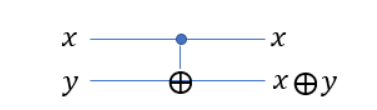



Also Called CX- Gate is given by the matrix:

$$ CNOT = \begin{bmatrix} 1  & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{bmatrix} =|0\rangle⟨0|⊗I + |1\rangle⟨1|⊗X
$$

<details>
  <summary><b>Click here to see the derivation of the CNOT matrix</b></summary>

\[\begin{aligned}
      CNOT & = |0\rangle⟨0|⊗I + |1\rangle⟨1|⊗X \\ & =
                 ( \begin{bmatrix} 1 \\ 0 \end{bmatrix} \begin{bmatrix} 0 & 1\end{bmatrix}) ⊗ I + (\begin{bmatrix} 0 \\ 1 \end{bmatrix} \begin{bmatrix} 1 & 0 \end{bmatrix}) ⊗X\\
      & = \begin{bmatrix} 0 & 1 \\ 0 & 0 \end{bmatrix} ⊗ \begin{bmatrix} 1& 0 \\ 0 & 1\end{bmatrix} + \begin{bmatrix} 0 & 0 \\ 1 & 0 \end{bmatrix} ⊗ \begin{bmatrix} 0& 1 \\ 1 & 0\end{bmatrix} \\
                 & = \begin{bmatrix} 0  & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0\end{bmatrix} +  \begin{bmatrix} 0  & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 1 & 0 & 0 & 0\end{bmatrix} \\
                 & = \begin{bmatrix} 0  & 0 & 1 & 0 \\ 0 & 0 & 0 & 1  \\ 0 & 1 & 0 & 0 \\ 1 & 0 & 0 & 0\end{bmatrix}
                 =\begin{bmatrix} 1  & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{bmatrix}
      \end{aligned}
      \]

</details>




**Examples:** let's consider its operation on the basis states of a two-qubit system

For a state $|q_1q_0\rangle$ here $CX(q_0,q_1)$ means $q_0$ =control and $q_1$ = Target
1. $CX|00⟩=|00⟩$ since control= 0 and target=0 (no change)
2. $CX|10⟩=|10⟩$ since control= 0 and target=1 (no change)
3. $CX|01⟩=|11⟩$ since control= 1 and target=0 (Bit Flip on target Bit)
4. $CX|11⟩=|01⟩$ since control= 1 and target=1 (Bit Flip on target Bit)

Derivations of these examples
1. $CX|01⟩=\begin{bmatrix} 1  & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{bmatrix}⋅  \begin{bmatrix} 0  \\ 0 \\ 1  \\ 0 \end{bmatrix}  =|11⟩$


-  Any multiple qubit logic gate may be composed from CNOT and single qubit gates.

- Truth Table For the same is

| Control (A) | Target (B) | CX (Control, Target ⊕ Control) | XOR  (A ⊕ B) |
|------------|-----------|-------------------------------------|------------------|
| 0          | 0         | (0, 0 ⊕ 0) → (0, 0)                | 0 ⊕ 0 = 0        |
| 0          | 1         | (0, 1 ⊕ 0) → (0, 1)                | 0 ⊕ 1 = 1        |
| 1          | 0         | (1, 0 ⊕ 1) → (1, 1)                | 1 ⊕ 0 = 1        |
| 1          | 1         | (1, 1 ⊕ 1) → (1, 0)                | 1 ⊕ 1 = 0        |


**In Qiskit**
```
qc.cx(control qubit, target qubit)
```

**Lets Run Example 3 In Qiskit, CX|01>=|11>**



In [ ]:
#create The Circuit

# |01> means q1=0 and q0=1
qc = QuantumCircuit(2,2)
qc.x(0) # so our state is |01> means q1=0 , q0=1

#if you want to run Example 2 comment the above line and uncomment the below line
# qc.x(1) # so our state is |10> means q1=1 , q0=0

qc.cx(0,1)  # Apply CNOT: q0 (control), q1 (target)
qc.measure((0,1), (0,1))

# Draw the circuit
qc.draw('mpl')


In [ ]:
# Initialize the simulator
backend = AerSimulator()

# Run ideal simulation
cx_results = backend.run(transpile(qc, backend), shots=1000).result()
cx_counts = cx_results.get_counts()

# Show the results
print(cx_counts)
plot_histogram(cx_counts)

### **Bell states and GHZ states**

CNOT is an essential gate for generating entanglement, which is a unique property of quantum mechanics. Two important types of entangled states are:

1.  Bell States(2 qubits)
2.  GHZ states(3 or  more qubits)


#### **Bell States( Maximally Entangled 2-qubit states**
A Bell State is a special 2-qubit entangled state.

##### **Mathematical Form**
The **four Bell states** are:

$$
|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$

$$
|\Phi^-\rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)
$$

$$
|\Psi^+\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)
$$

$$
|\Psi^-\rangle = \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)
$$

### **Creating a Bell Pair using Hadamard + CNOT**
Applying a Hadamard gate to the first qubit and then a CNOT gate generates an entangled Bell pair.

Initial state is $|00\rangle = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}$

1. Apply Hadamard on the first qubit creates superposition over the first qubit
$ I \otimes H $ on $|00⟩$
  $$ I \otimes H =\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \otimes \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$

  This is gives 4x4 matrix which will be applied on $|00\rangle$ (a 4x1 matrix)

  $$(I\otimes H)|00⟩= \frac{1}{\sqrt{2}} (|00\rangle +|01\rangle) $$

2. Apply CX on qubit 1 as control and qubit 2 as target.

This entangles the two qubits into the bell state.

$$CX(\frac{1}{\sqrt{2}} (|00\rangle +|01\rangle)) = \begin{bmatrix} 1  & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{bmatrix}  \begin{bmatrix} 1 \\ 0 \\ 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 1 \end{bmatrix} $$





####**Create Bell State in Qiskit**

In [ ]:
qc = QuantumCircuit(2,2)

#apply hadamard on first qubit which creates superposition
qc.h(0)
state1 = Statevector.from_instruction(qc)

#apply CX
qc.cx(0,1)
state2 = Statevector.from_instruction(qc)

qc.measure((0,1), (0,1))
qc.draw('mpl')

In [ ]:
''' State after First Hadamard on first qubit'''
state1.draw('latex')

In [ ]:
''' State after Controlled Not Gives Bell state'''
state2.draw('latex')

In [ ]:
backend = AerSimulator()
results = backend.run(transpile(qc, backend), shots=1000).result()
counts = results.get_counts()
plot_histogram(counts)

#### **GHZ State**
### **GHZ State (Greenberger–Horne–Zeilinger State)**

A **GHZ state** is a 3-qubit generalization of Bell states, creating **stronger entanglement** among all three qubits.

#### **Mathematical Form**
The standard GHZ state is:

$$
|GHZ\rangle = \frac{1}{\sqrt{2}}(|000\rangle + |111\rangle)
$$

### **Creating a GHZ State using Hadamard + CNOT**
Applying a Hadamard gate to the first qubit and then two CNOT gates generates an entangled GHZ state.

The **initial state** is:

$$
|000\rangle = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \end{bmatrix}
$$

1. Apply Hadamard to the first qubit
This creates superposition over the first qubit:

$$
I \otimes I \otimes H = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \otimes \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \otimes \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
$$

This results in:

$$
(I \otimes I \otimes H)|000\rangle = \frac{1}{\sqrt{2}} (|000\rangle + |001\rangle)
$$

2. Apply CX (CNOT) with qubit 1 as control and qubit 2 as target**
This entangles the first two qubits:

$$
CX_{1,2} \left( \frac{1}{\sqrt{2}} (|000\rangle + |001\rangle) \right) = \frac{1}{\sqrt{2}} (|000\rangle + |011\rangle)
$$

3. Apply CX (CNOT) with qubit 1 as control and qubit 3 as target
This entangles all three qubits, forming the GHZ state:

$$
CX_{1,3} \left( \frac{1}{\sqrt{2}} (|000\rangle + |011\rangle) \right) = \frac{1}{\sqrt{2}} (|000\rangle + |111\rangle)
$$

Thus, we have successfully created the **GHZ state**!





In [ ]:
# Create a quantum circuit with 3 qubits
qc = QuantumCircuit(3,3)

# Apply Hadamard to the first qubit
qc.h(0)
state1 = Statevector.from_instruction(qc)


# Apply CNOT (CX) with qubit 0 as control and qubit 1 as target
qc.cx(0, 1)
state2 = Statevector.from_instruction(qc)

# Apply CNOT (CX) with qubit 0 as control and qubit 2 as target
qc.cx(0, 2)
state3 = Statevector.from_instruction(qc)

qc.measure([0,1,2], [0,1,2])

# Draw the circuit
qc.draw('mpl')

In [ ]:
''' State after First Hadamard on first qubit'''
state1.draw('latex')

In [ ]:
''' State after First Cnot  with control on qubit 0 and target on qubit 2'''
state2.draw('latex')

In [ ]:
''' GHZ State after CX with qubit 0 as control and qubit 2 as target'''
state3.draw('latex')

In [ ]:
backend = AerSimulator()
results = backend.run(transpile(qc, backend), shots=1000).result()
counts = results.get_counts()
plot_histogram(counts)

## **2.3 CZ- Gate**
Similar to CNOT- gate, It also has One control bit and One target bit.

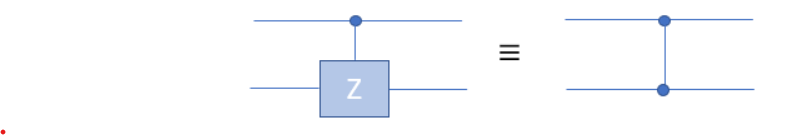
1. if the control qubit is in state |0⟩, the CZ gate does nothing to either qubit.

2. if control qubit is in state |1⟩ apply $ Z $ (Phase Flip) on the target bit.

$$ CZ = \begin{bmatrix} 1  & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & -1\end{bmatrix} =|0\rangle⟨0|⊗I + |1\rangle⟨1|⊗Z
$$

To understand the CZ gate better, let's consider its operation on the basis states of a two-qubit system:

1. $CZ|00\rangle = |00\rangle $ (Control qubit is |0⟩, no change)

2. $CZ|01\rangle  = |01\rangle $ (Control qubit is |0⟩, no change)

3. $CZ|10\rangle  = |10\rangle $ (Control qubit is |1⟩, no change to target qubit |0⟩)

4. $CZ|11\rangle  = -|11\rangle$  (Control qubit is |1⟩, phase flip applied to target qubit |1⟩)

$CX|11⟩=\begin{bmatrix} 1  & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & -1\end{bmatrix}⋅  \begin{bmatrix} 0  \\ 0 \\ 0  \\ 1 \end{bmatrix}  =-|11⟩$


we can write CZ in another way
$$ CZ = H.CX.H $$
**In Qisit we apply Cz in applied in this way**


```
qc.cz(control,target)
```



In [ ]:
qc = QuantumCircuit(2)
qc.cz(0, 1)  # Apply CZ with qubit 0 as control and qubit 1 as target
qc.draw('mpl')

## **2.4 Toffoli Gate(CCNOT)**

This is a Similar gate to CX and CZ. But This is a 3-qubit gate So its dimensions are $8X8$ matrix ($2^3$ states). we have

1. Two Control Qubits
2. One Target qubit

* If both control qubits are 1, the target qubit is flipped.
Otherwise, the target qubit remains unchanged.
*  Otherwise, the target qubit remains unchanged.

Matrix Representation

$$CCX = |00⟩⟨00|⊗I+|01⟩⟨01|⊗I+|10⟩⟨10|⊗I+|11⟩⟨11|⊗X $$

Expanding the matrix we get:

$$
CCX =
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0
\end{bmatrix}
$$

- Toffoli Gate is Analogous to $NAND$-$gate$  
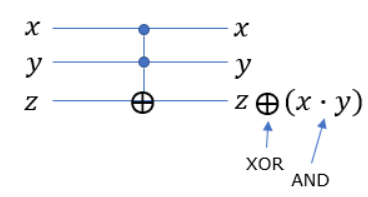


**Examples**

1. $CCX|000⟩=|000⟩$ (Control bits are 0, no change)

2. $CCX|010⟩=|010⟩$ (Only one control bit is 1, no change)

3. $CCX|011⟩=|111⟩$ (Both control bits are 1, target bit is flipped)

4. $CCX|111⟩=|011⟩$ (Both control bits are 1, target bit is flipped)

**In Qiskit it's** `ccx( control,control,target)`


**Let's Implement Example-4 CCX|111⟩=|011⟩**

In [ ]:
#First Create |111> state
qc = QuantumCircuit(3,3)
qc.x(0)
qc.x(1)
qc.x(2)

#Apply Toffoli Gate
qc.ccx(0,1,2)  # Apply ccx with qubit 0 and 1 as control and qubit 2 as target

qc.measure([0,1,2],[0,1,2])
qc.draw('mpl')

In [ ]:
# Initialize the simulator
backend = AerSimulator()

# Run ideal simulation
ccx_results = backend.run(transpile(qc, backend), shots=1000).result()
ccx_counts = ccx_results.get_counts()

# Show the results
print(ccx_counts)
plot_histogram(ccx_counts)

## **2.5 SWAP Gate**
The primary function of the SWAP gate is to **"swap"** the states of two qubits

- It's a 2-Qubit Gate That swaps the two qubits given as input.The matrix form is as follows
$$ SWAP=\begin{bmatrix} 1  & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1\end{bmatrix}$$

$$ \quad\quad\quad\quad= |00\rangle \langle00| + |11\rangle \langle11| + |01\rangle \langle10| + |10\rangle \langle01|
$$
 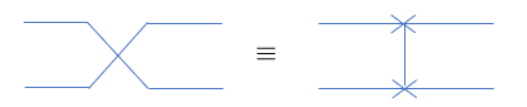

 **In Qiskit we use qc.swap(qubit 0, qubit 1)**




**let's Swap for a state |10⟩ -> |01⟩**

In [ ]:
#create the |10>
qc = QuantumCircuit(2,2)
qc.x(1)

#apply Swap
qc.swap(0, 1)  # Swap the states of qubit 0 and qubit 1

#measure
qc.measure([0,1],[0,1])

qc.draw('mpl')

In [ ]:
# Initialize the simulator
backend = AerSimulator()

# Run ideal simulation
swap_results = backend.run(transpile(qc, backend), shots=1000).result()
swap_counts = swap_results.get_counts()

# Show the results
print(swap_counts)
plot_histogram(swap_counts)

# **Summary**

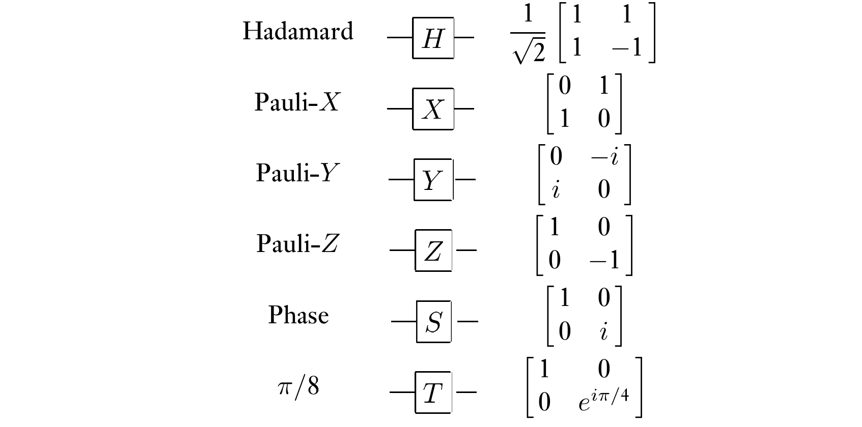

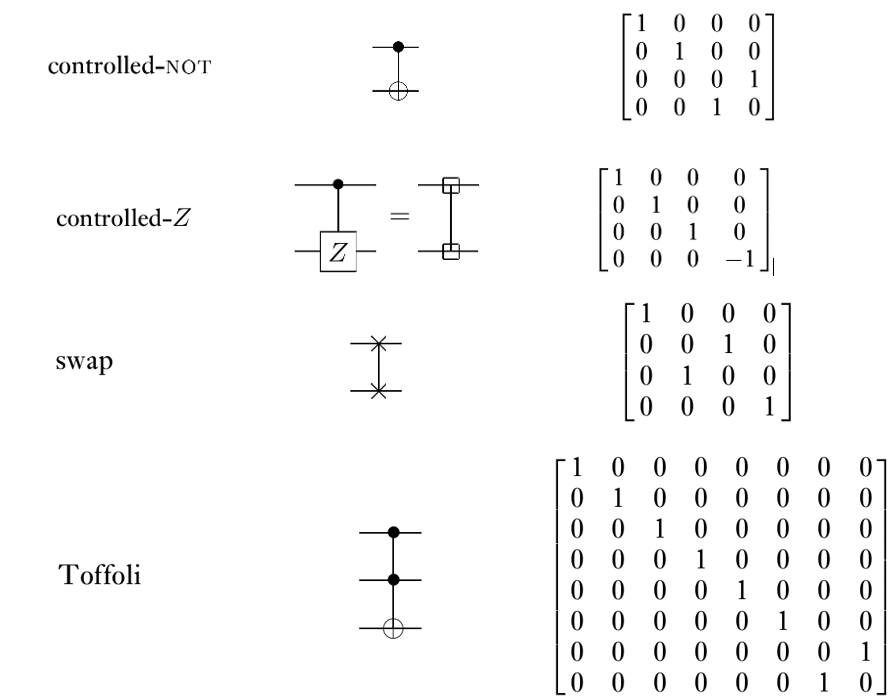

# **Quantum Teleportation**

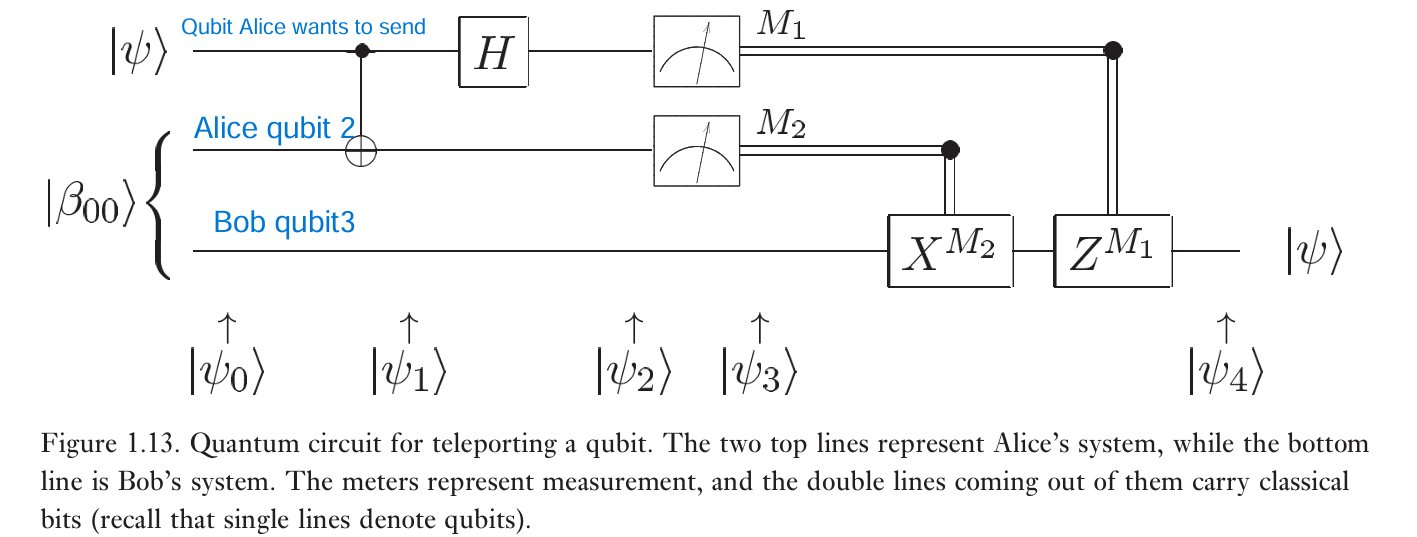


Quantum teleportation is a protocol that allows the **transfer of an unknown qubit state** from one party (**Alice**) to another (**Bob**) using **entanglement and classical communication**.


This process does **not** involve physically transmitting the qubit itself but instead transmits its **state** via shared entanglement and two classical bits.  


## **The Goal**
Alice has a **qubit in an unknown state**:

$$
|\psi\rangle = \alpha|0\rangle + \beta|1\rangle
$$

She wants to send this **state** to Bob **without physically sending the qubit**.

However, **quantum mechanics forbids cloning** (No-Cloning Theorem), so she cannot just measure and reconstruct it.

Instead, she must use *entanglement and classical communication*.


## **The Quantum Circuit**
The teleportation circuit consists of three qubits:
- **Qubit 1**: Alice’s **unknown qubit** to be teleported.
- **Qubit 2**: Alice’s **half** of an **entangled Bell pair**.
- **Qubit 3**: Bob’s **half** of the entangled Bell pair.

The steps of the protocol are:



## **1. Initial State Preparation**
Alice wants to teleport an **unknown qubit state** to Bob:

$$
|\psi\rangle = \alpha |0\rangle + \beta |1\rangle
$$

Alice and Bob **pre-share** an entangled Bell pair:

$$
|\Phi^+\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}
$$

The **combined state** of all three qubits (Alice’s unknown qubit + Bell pair) is:

$$
|\psi\rangle \otimes |\Phi^+\rangle = (\alpha |0\rangle + \beta |1\rangle) \otimes \frac{|00\rangle + |11\rangle}{\sqrt{2}}
$$

Expanding:

$$
\frac{\alpha |000\rangle + \alpha |011\rangle + \beta |100\rangle + \beta |111\rangle}{\sqrt{2}}
$$



## **2. Alice Applies Hadamard and CNOT**


- **Applying Hadamard on Qubit 1**

Applying $H$ to Qubit 1:

$$
H |0\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}, \quad H |1\rangle = \frac{|0\rangle - |1\rangle}{\sqrt{2}}
$$

Thus:

$$
H |\psi\rangle = H (\alpha |0\rangle + \beta |1\rangle)
$$



$$
= \frac{(\alpha + \beta) |0\rangle + (\alpha - \beta) |1\rangle}{\sqrt{2}}
$$

Applying this transformation to the full **three-qubit system**:

$$
\frac{1}{\sqrt{2}} \left[ (\alpha + \beta) |000\rangle + (\alpha + \beta) |011\rangle + (\alpha - \beta) |100\rangle + (\alpha - \beta) |111\rangle \right]
$$


- **Applying CNOT (Qubit 1 as Control, Qubit 2 as Target)**


Applying CNOT **(Qubit 1 → Qubit 2)**:

$$
\begin{aligned}
CNOT \left( \frac{1}{2} \left[ (\alpha + \beta) |000\rangle + (\alpha + \beta) |011\rangle + (\alpha - \beta) |100\rangle + (\alpha - \beta) |111\rangle \right] \right) \\
= \frac{1}{2} \left[ (\alpha + \beta) |000\rangle + (\alpha + \beta) |011\rangle + (\alpha - \beta) |110\rangle + (\alpha - \beta) |101\rangle \right]
\end{aligned}
$$

Now, Alice's **first two qubits** are **entangled in a Bell basis**, and we can rewrite this in terms of **Bell states**.


We express Alice's **first two qubits** in the **Bell basis**:

$$
|\Phi^\pm\rangle = \frac{|00\rangle \pm |11\rangle}{\sqrt{2}}, \quad |\Psi^\pm\rangle = \frac{|01\rangle \pm |10\rangle}{\sqrt{2}}
$$

Now, **observe the first two qubits (Alice's qubits)**:

$$
\frac{1}{2} \left[ (\alpha + \beta) |00\rangle + (\alpha - \beta) |10\rangle + (\alpha + \beta) |01\rangle + (\alpha - \beta) |11\rangle \right] \otimes |b\rangle
$$

Rewriting in terms of the **Bell states**:

$$
\frac{1}{2} \left[ |\Phi^+\rangle (\alpha |0\rangle + \beta |1\rangle) + |\Psi^+\rangle (\alpha |1\rangle + \beta |0\rangle) + |\Phi^-\rangle (\alpha |0\rangle - \beta |1\rangle) + |\Psi^-\rangle (\alpha |1\rangle - \beta |0\rangle) \right]
$$

This expresses the state **fully in the Bell basis**, making it clear that Bob's qubit is in a **corrupted version** of $|\psi\rangle$, and Alice's measurement will determine the correction.


### **3. Alice Measures & Sends Classical Bits and bob applies correction based on them**

- Alice measures her **first two qubits** (in the Bell basis).  
- The measurement collapses Alice's qubits into **one of four possible classical outcomes**.  
- **Alice sends two classical bits** (00, 01, 10, or 11) to Bob.  

After measurement, Bob’s qubit is now in **one of the four states**:

1. If Alice gets $|\Phi^+\rangle$ (00), Bob already has $|\psi\rangle$.  
2. If Alice gets $|\Psi^+\rangle$ (01), Bob has $X|\psi\rangle$.  
3. If Alice gets $|\Phi^-\rangle$ (10), Bob has $Z|\psi\rangle$.  
4. If Alice gets $|\Psi^-\rangle$ (11), Bob has $XZ|\psi\rangle$
After measurement, Bob’s qubit is left in one of four possible states:  

$$
|\psi\rangle, \quad X|\psi\rangle, \quad Z|\psi\rangle, \quad XZ|\psi\rangle
$$

The classical bits tell Bob **which correction to apply**.




After applying the correction, Bob's qubit is exactly:

$$
|\psi\rangle = \alpha |0\rangle + \beta |1\rangle
$$


## **5. Final Observations**
- **Quantum teleportation does not violate relativity**, since classical communication is required.
- **No information is cloned**, respecting the **No-Cloning Theorem**.
- **Entanglement is necessary**—without it, Alice’s classical bits are meaningless.




In [ ]:


# Create quantum and classical registers
qr = QuantumRegister(3, name="q")  # 3 qubits
cr = ClassicalRegister(2, name="c")  # 2 classical bits (for Alice's measurements)
qc = QuantumCircuit(qr, cr)

# Step 1: Create Entangled Pair Between Alice and Bob
qc.h(1)  # Apply Hadamard gate to q1
qc.cx(1, 2)  # Apply CNOT gate with q1 as control and q2 as target

# Step 2: Prepare the Qubit to be Teleported (Alice’s unknown qubit)
qc.barrier()
qc.h(0)  # Hadamard on q0
qc.cx(0, 1)  # CNOT on q0 and q1

# Step 3: Measure Alice’s Qubits and Store Results in Classical Register
qc.barrier()
qc.measure(0, 0)  # Measure q0 into c0
qc.measure(1, 1)  # Measure q1 into c1

# Step 4 & 5: Bob Applies Corrections Based on Alice’s Classical Bits
qc.barrier()
with qc.if_test((cr[1], 1)):  # If Alice’s second measurement (M₂) == 1
    qc.x(qr[2])  # Apply X to Bob's qubit

with qc.if_test((cr[0], 1)):  # If Alice’s first measurement (M₁) == 1
    qc.z(qr[2])  # Apply Z to Bob's qubit
# Draw the circuit
qc.draw("mpl")


In [ ]:
# Simulate the circuit
backend = AerSimulator()
result = backend.run(qc, shots=1024).result()
counts = result.get_counts()

In [ ]:
# Plot the results
plot_histogram(counts)